In [1]:
pip install numpy matplotlib torch torchvision torchaudio

     ---------------------------------------- 2.4/2.4 MB 235.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import torch
import torchvision
# import tarfile  # to unarchive .tgz datasets
# from torchvision.datasets.utils import download_url   # to download datasets from its destination url
from torch.utils.data import random_split

In [4]:
data_dir = 'C:/Users/Ashish Karn/Desktop/Academic Internship/ImageClassification/datasets'

train_dir = 'C:/Users/Ashish Karn/Desktop/Academic Internship/ImageClassification/datasets/train'
test_dir = 'C:/Users/Ashish Karn/Desktop/Academic Internship/ImageClassification/datasets/test'
validation_dir = 'C:/Users/Ashish Karn/Desktop/Academic Internship/ImageClassification/datasets/valid'

In [8]:
print(os.listdir(data_dir))

classes = os.listdir(data_dir +"/train")

print(classes)

['EfficientNetB0-100-(224 X 224)- 98.40.h5', 'sports.csv', 'test', 'train', 'valid']
['air hockey', 'ampute football', 'archery', 'arm wrestling', 'axe throwing', 'balance beam', 'barell racing', 'baseball', 'basketball', 'baton twirling', 'bike polo', 'billiards', 'bmx', 'bobsled', 'bowling', 'boxing', 'bull riding', 'bungee jumping', 'canoe slamon', 'cheerleading', 'chuckwagon racing', 'cricket', 'croquet', 'curling', 'disc golf', 'fencing', 'field hockey', 'figure skating men', 'figure skating pairs', 'figure skating women', 'fly fishing', 'football', 'formula 1 racing', 'frisbee', 'gaga', 'giant slalom', 'golf', 'hammer throw', 'hang gliding', 'harness racing', 'high jump', 'hockey', 'horse jumping', 'horse racing', 'horseshoe pitching', 'hurdles', 'hydroplane racing', 'ice climbing', 'ice yachting', 'jai alai', 'javelin', 'jousting', 'judo', 'lacrosse', 'log rolling', 'luge', 'motorcycle racing', 'mushing', 'nascar racing', 'olympic wrestling', 'parallel bar', 'pole climbing', 'po

In [31]:
from torchvision import transforms

# transformations for data augmentation and normalization
data_transform = transforms.Compose([
    transforms.Resize((256,256)),
    transforms.ToTensor(),
])

# Load datasets using ImageFolder
train_ds = torchvision.datasets.ImageFolder(root=train_dir, transform=data_transform)
test_ds = torchvision.datasets.ImageFolder(root=test_dir, transform=data_transform)
valid_ds = torchvision.datasets.ImageFolder(root=validation_dir, transform=data_transform)

# Define batch size for dataloaders
batch_size = 32

# Create DataLoader objects for train, test, and validation datasets
train_loader = torch.utils.data.DataLoader(train_ds, 
                                           batch_size=batch_size, 
                                           shuffle=True, 
                                           num_workers=4, 
                                           pin_memory=True)
# test_loader = torch.utils.data.DataLoader(test_ds, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)
valid_loader = torch.utils.data.DataLoader(valid_ds, 
                                           batch_size=batch_size*2, 
                                           shuffle=False,
                                           num_workers=4,
                                           pin_memory=True)

In [32]:
img, label = train_ds[1000]
print(img.shape, label)
img

torch.Size([3, 256, 256]) 7


tensor([[[0.0118, 0.0118, 0.0078,  ..., 0.1294, 0.1725, 0.2157],
         [0.0039, 0.0078, 0.0039,  ..., 0.1373, 0.1804, 0.2235],
         [0.0157, 0.0157, 0.0118,  ..., 0.1529, 0.1922, 0.2275],
         ...,
         [0.3098, 0.3490, 0.2902,  ..., 0.2196, 0.2510, 0.1843],
         [0.2118, 0.3373, 0.3804,  ..., 0.2980, 0.3137, 0.2431],
         [0.3216, 0.3647, 0.3882,  ..., 0.3922, 0.3451, 0.2510]],

        [[0.0902, 0.0902, 0.0863,  ..., 0.4039, 0.4118, 0.4235],
         [0.0902, 0.0863, 0.0824,  ..., 0.4078, 0.4118, 0.4196],
         [0.0941, 0.0941, 0.0902,  ..., 0.4039, 0.4078, 0.4157],
         ...,
         [0.1686, 0.2078, 0.1490,  ..., 0.0863, 0.1176, 0.0510],
         [0.0549, 0.1804, 0.2235,  ..., 0.1647, 0.1804, 0.1098],
         [0.1529, 0.1961, 0.2196,  ..., 0.2588, 0.2118, 0.1176]],

        [[0.0941, 0.0863, 0.0824,  ..., 0.2745, 0.2902, 0.3137],
         [0.0863, 0.0824, 0.0784,  ..., 0.2784, 0.2941, 0.3137],
         [0.0863, 0.0863, 0.0824,  ..., 0.2824, 0.2980, 0.

In [33]:
print(len(train_ds))
print(len(test_ds))
print(len(valid_ds))

13492
500
500


In [34]:
print(train_ds.classes)

['air hockey', 'ampute football', 'archery', 'arm wrestling', 'axe throwing', 'balance beam', 'barell racing', 'baseball', 'basketball', 'baton twirling', 'bike polo', 'billiards', 'bmx', 'bobsled', 'bowling', 'boxing', 'bull riding', 'bungee jumping', 'canoe slamon', 'cheerleading', 'chuckwagon racing', 'cricket', 'croquet', 'curling', 'disc golf', 'fencing', 'field hockey', 'figure skating men', 'figure skating pairs', 'figure skating women', 'fly fishing', 'football', 'formula 1 racing', 'frisbee', 'gaga', 'giant slalom', 'golf', 'hammer throw', 'hang gliding', 'harness racing', 'high jump', 'hockey', 'horse jumping', 'horse racing', 'horseshoe pitching', 'hurdles', 'hydroplane racing', 'ice climbing', 'ice yachting', 'jai alai', 'javelin', 'jousting', 'judo', 'lacrosse', 'log rolling', 'luge', 'motorcycle racing', 'mushing', 'nascar racing', 'olympic wrestling', 'parallel bar', 'pole climbing', 'pole dancing', 'pole vault', 'polo', 'pommel horse', 'rings', 'rock climbing', 'roller 

In [35]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [36]:
def show_images(img, label, dataset=train_ds):
    print('Label: ', dataset.classes[label], "= "+str(label))
    plt.imshow(img.permute(1,2,0))  #change dimension of tensor for matplotlib 

Label:  ampute football = 1


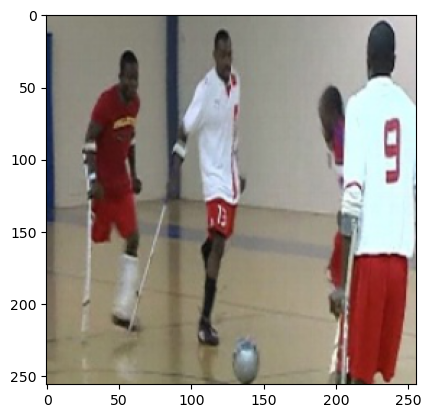

In [37]:
# img, label = dataset[0]
# show_images(img, label)

show_images(*train_ds[147])

In [28]:
# Since the test set is for the actual competition,
# we would not be able to use it for actual testing.
# So we will use Valid_ds for testing purpose


In [38]:
from torchvision.utils import make_grid


In [45]:
def show_batch(data):
    for images, labels in data:
        fig, ax = plt.subplots(figsize=(12,6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=8).permute(1,2,0))
        break

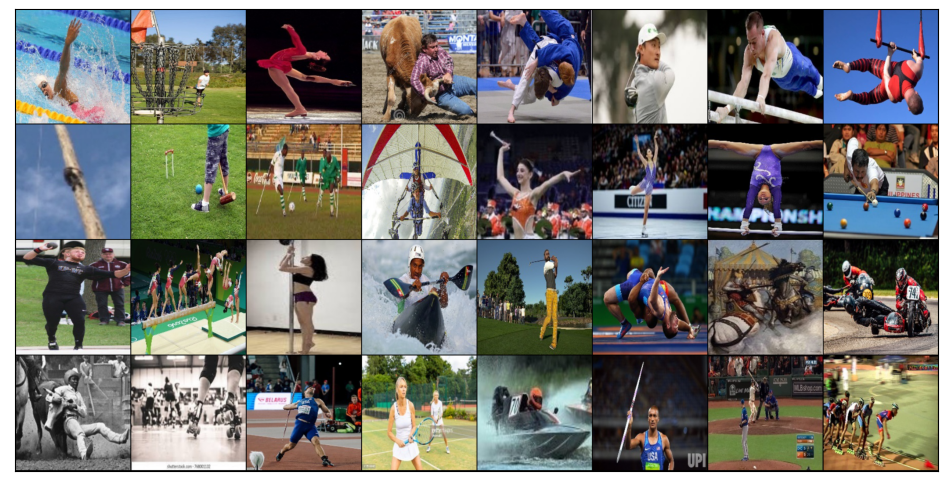

In [46]:
show_batch(train_loader)

In [ ]:
def apply_kernel(image, kernel):
    ri, ci = image.shape       # image dimensions
    rk, ck = kernel.shape      # kernel dimensions
    ro, co = ri-rk+1, ci-ck+1  # output dimensions
    output = torch.zeros([ro, co])
    for i in range(ro): 
        for j in range(co):
            output[i,j] = torch.sum(image[i:i+rk,j:j+ck] * kernel)
    return output

In [47]:
import torch.nn as nn
import torch.nn.functional as F

In [71]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch
        out = self(images)                    # generate predictions
        loss = F.cross_entropy(out, labels)   # calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)           # calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [72]:
class SportsClassificationCnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            # input: 3 x 256 x 256
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            # output: 32 x 256 x 256
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            # output: 64 x 256 x 256
            nn.ReLU(),
            nn.MaxPool2d(2, 2), 
            # output: 64 x 128 x 128

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            # output: 128 x 128 x 128
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            # output: 128 x 128 x 128
            nn.ReLU(),
            nn.MaxPool2d(2, 2), 
            # output: 128 x 64 x 64

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            # output: 256 x 64 x 64
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            # output: 256 x 64 x 64
            nn.ReLU(),
            nn.MaxPool2d(2, 2), 
            # output: 256 x 32 x 32
            
            nn.Conv2d(256,512, kernel_size=3, stride=1, padding=1),
            # output: 512 x 32 x 32
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            # output: 512 x 32 x 32
            nn.ReLU(),
            nn.MaxPool2d(2, 2), 
            # output: 512 x 16 x 16
            
            nn.Conv2d(512, 1024, kernel_size=3, stride=1, padding=1),
            # output: 1024 x 16 x 16
            nn.ReLU(),
            nn.Conv2d(1024, 1024, kernel_size=3, stride=1, padding=1),
            # output: 1024 x 16 x 16
            nn.ReLU(),
            nn.MaxPool2d(2, 2), 
            # output: 1024 x 8 x 8

            nn.Flatten(), 
            nn.Linear(1024*8*8, 4096),
            nn.ReLU(),
            nn.Linear(4096, 1024),
            nn.ReLU(),
            nn.Linear(1024, 100))
        
    def forward(self, xb):
        return self.network(xb)

In [73]:
model = SportsClassificationCnnModel()
model

SportsClassificationCnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (16): ReLU()
    (17): Conv2d(512, 512, kernel_size=(3

In [74]:
for images, labels in train_loader:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([32, 3, 256, 256])
out.shape: torch.Size([32, 100])
out[0]: tensor([ 0.0111, -0.0105,  0.0184,  0.0124,  0.0287, -0.0033, -0.0170,  0.0048,
        -0.0162,  0.0128, -0.0120,  0.0314, -0.0085, -0.0279,  0.0084,  0.0340,
        -0.0057, -0.0025,  0.0061,  0.0045, -0.0163, -0.0199, -0.0089, -0.0242,
        -0.0147, -0.0163, -0.0152,  0.0043,  0.0196, -0.0197,  0.0341,  0.0254,
        -0.0242,  0.0171, -0.0370,  0.0178, -0.0224, -0.0236, -0.0194, -0.0293,
        -0.0225,  0.0257, -0.0309,  0.0143, -0.0147,  0.0109, -0.0181,  0.0265,
         0.0069,  0.0022,  0.0114,  0.0308, -0.0102,  0.0189, -0.0042,  0.0158,
         0.0328,  0.0318, -0.0085,  0.0286,  0.0280,  0.0010, -0.0053,  0.0101,
         0.0009,  0.0260, -0.0217,  0.0084,  0.0127,  0.0099, -0.0177, -0.0150,
        -0.0140, -0.0251, -0.0089, -0.0058, -0.0114, -0.0313,  0.0216, -0.0059,
         0.0006,  0.0267, -0.0318,  0.0244,  0.0124, -0.0222,  0.0268,  0.0109,
        -0.0112,  0.0013,  0.0118, 

In [75]:
for images, labels in train_loader:
    print('label:', labels)
#     print('out[0]:', out[0])
    break

label: tensor([12, 46, 80, 88, 96, 80, 36, 52, 31,  8, 32, 11, 37, 45,  8, 25, 84, 62,
        15, 81, 79, 16, 21, 82, 99, 62, 65, 14,  1, 66, 79, 69])


In [76]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [77]:
torch.cuda.is_available()

False

In [78]:
device = get_default_device()
device

device(type='cpu')

In [79]:
train_loader = DeviceDataLoader(train_loader, device)
valid_loader = DeviceDataLoader(valid_loader, device)
to_device(model, device);

In [80]:
@torch.no_grad()  # don't compute gradient descent during evaluation
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [81]:
model = to_device(SportsClassificationCnnModel(), device)

In [82]:
evaluate(model, valid_loader)

{'val_loss': 4.605280876159668, 'val_acc': 0.009765625}

In [83]:
num_epochs = 2
opt_func = torch.optim.Adam
lr = 0.001

In [84]:
history = fit(num_epochs, lr, model, train_loader, valid_loader, opt_func)

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x00000216ACD6B430>
Traceback (most recent call last):
  File "C:\Users\Ashish Karn\anaconda3\lib\site-packages\torch\utils\data\dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "C:\Users\Ashish Karn\anaconda3\lib\site-packages\torch\utils\data\dataloader.py", line 1437, in _shutdown_workers
    if self._persistent_workers or self._workers_status[worker_id]:
AttributeError: '_MultiProcessingDataLoaderIter' object has no attribute '_workers_status'


KeyboardInterrupt: 